In [1]:
using Distributions:Uniform
using Distributions:Normal
using Random
using LinearAlgebra
using Plots
using StatsBase

In [ ]:
K_BOLTZMANN = 1.3806505e-23
AMU_TO_KG = 1.66048e-27

function randomMBSampleRejectionSampling(temperature_K_,collisionGasMass_Amu_, vFrame = [0.0,0.0,0.0])
    vGas = [0.0,0.0,0.0]
    speedIon = norm(vFrame)

    vrStdevGas = sqrt(K_BOLTZMANN * temperature_K_ / (collisionGasMass_Amu_ * AMU_TO_KG))
    scale = speedIon + vrStdevGas * 1.732 * 3


    sampleFound = false
    while sampleFound == false 

        vGas[1] = rand(Normal(0.0,vrStdevGas)) 
        vGas[2] = rand(Normal(0.0,vrStdevGas)) 
        vGas[3] = rand(Normal(0.0,vrStdevGas)) 
        
        len = sqrt(
                (vGas[1] - vFrame[1])^2.0 +
                (vGas[2] - vFrame[2])^2.0 +
                (vGas[3] - vFrame[3])^2.0
            )

        sampleFound = rand(Uniform(0,1)) < (len / scale)
    end
    return vGas
end
    
function randomMBSample(temperature_K_,collisionGasMass_Amu_)
    
    vrStdevGas = sqrt(K_BOLTZMANN * temperature_K_ / (collisionGasMass_Amu_ * AMU_TO_KG))

    vGas = [0.0,0.0,0.0]    
    
    vGas[1] = rand(Normal(0.0,vrStdevGas)) 
    vGas[2] = rand(Normal(0.0,vrStdevGas)) 
    vGas[3] = rand(Normal(0.0,vrStdevGas))     

    return vGas
end

function mbDistribution(temp, mass, nSamples = 10000, rejectionSampling = false, vFrame = [0.0,0.0,0.0])
    if rejectionSampling == true
        samples = [randomMBSampleRejectionSampling(temp,mass,vFrame) for i in 1:nSamples]
    else
        samples = [randomMBSample(temp,mass) for i in 1:nSamples]
    end

    lengths = [norm(sample) for sample in samples]
    xi = [sample[1] for sample in samples]
    yi = [sample[2] for sample in samples]
    zi = [sample[3] for sample in samples]    

    edges_l = [li for li in LinRange(0,2000,100)]
    hist_l = fit(Histogram, lengths, edges_l)
    
    edges_od = [li for li in LinRange(-1800,1800,100)]
    hist_x = fit(Histogram, xi, edges_od)
    hist_y = fit(Histogram, yi, edges_od)
    hist_z = fit(Histogram, zi, edges_od)    

    return edges_od, hist_x.weights, hist_y.weights, hist_z.weights
end

function maxwellBoltzmannDensity(v, temp_K, mass_amu)
    mass_kg = mass_amu*AMU_TO_KG    
    dens = 4* pi * (mass_kg / (2*pi*K_BOLTZMANN*temp_K) )^(3.0/2.0)* v^2.0 * exp( -(mass_kg*v^2.0)/(2*K_BOLTZMANN*temp_K)) 
end


edges, wx, wy, wz = mbDistribution(298, 14, 50000, true, [200,500,0])
plot(edges[1:end-1],wx)
plot!(edges[1:end-1],wy)
plot!(edges[1:end-1],wz)


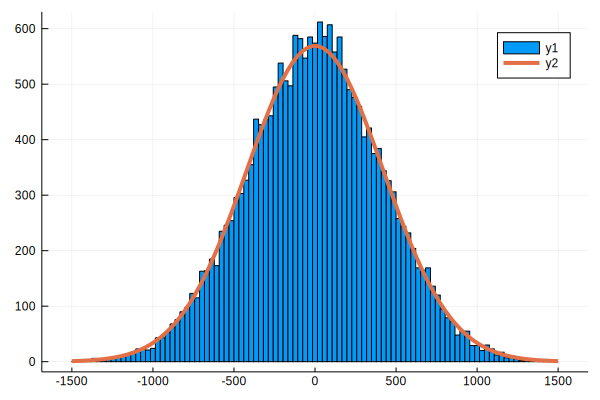

In [38]:
function mb1dim(v, temp_K, mass_amu)
    mass_kg = mass_amu*AMU_TO_KG    
    dens = (mass_kg / (2*pi*K_BOLTZMANN*temp_K) )^(1.0/2.0) * exp( -(mass_kg*v^2.0)/(2*K_BOLTZMANN*temp_K)) 
end

vrStdevGas = sqrt(K_BOLTZMANN * 298 / (14 * AMU_TO_KG))
mb1dSamples = rand(Normal(0.0,vrStdevGas),20000) 

velos = LinRange(-1500,1500,100)
d1Dim = [mb1dim(v, 298, 14) for v in velos]

histogram(mb1dSamples,bins=velos)
plot!(velos,d1Dim*6e5,linewidth=4)